In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Dataset
df = pd.read_csv(r'C:\Users\sanjy\Downloads\Employee_Attrition_Prediction\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Encoding Categorical Values
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'EducationField']
encoder = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(encoder.fit_transform)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Define Features and Target
y = df['Attrition']
X = df.drop(['EmployeeCount', 'Attrition', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [8]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [9]:
# Training and Evaluation
def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [10]:
# Initial Model
rf = RandomForestClassifier(random_state=42)

In [11]:
# Hyperparameter Tuning - RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(100, 1000, 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 150, 10)] + [None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [12]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [13]:
print("Training with Randomized Search CV:")
train_predict_evaluate(rf_random, X_train, y_train, X_test, y_test)

Training with Randomized Search CV:
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy:  0.8412698412698413
Precision:  0.7692307692307693
Recall:  0.12987012987012986
F1 Score:  0.2222222222222222
Confusion Matrix:
 [[361   3]
 [ 67  10]]


In [14]:
print("Best Params from RandomizedSearchCV:")
rf_random.best_params_

Best Params from RandomizedSearchCV:


{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 56,
 'bootstrap': True}

In [15]:
# Hyperparameter Tuning - GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [145, 150, 155],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [9, 10, 11],
    'n_estimators': [150, 175, 200]
}

In [16]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [17]:
print("Training with Grid Search CV:")
train_predict_evaluate(grid_search, X_train, y_train, X_test, y_test)

Training with Grid Search CV:
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Accuracy:  0.8412698412698413
Precision:  0.7692307692307693
Recall:  0.12987012987012986
F1 Score:  0.2222222222222222
Confusion Matrix:
 [[361   3]
 [ 67  10]]


In [18]:
print("Best Params from GridSearchCV:")
grid_search.best_params_

Best Params from GridSearchCV:


{'bootstrap': True,
 'max_depth': 145,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 200}

In [19]:
# Final Model with Tuned Parameters
best_rf = RandomForestClassifier(bootstrap=True, max_depth=145,
                                 min_samples_leaf=1, min_samples_split=9,
                                 n_estimators=200, random_state=42)

print("Final Tuned Random Forest Model:")
train_predict_evaluate(best_rf, X_train, y_train, X_test, y_test)

Final Tuned Random Forest Model:
Accuracy:  0.8412698412698413
Precision:  0.7692307692307693
Recall:  0.12987012987012986
F1 Score:  0.2222222222222222
Confusion Matrix:
 [[361   3]
 [ 67  10]]


In [20]:
# K-Fold Cross Validation
def cross_validation(model, X, y):
    scores = cross_validate(model, X, y, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))
    print("Accuracy: ", np.mean(scores['test_accuracy']))
    print("Precision: ", np.mean(scores['test_precision']))
    print("Recall: ", np.mean(scores['test_recall']))
    print("F1 Score: ", np.mean(scores['test_f1']))

In [21]:
print("Cross Validation on Untuned Model:\n")
cross_validation(rf, X, y)

Cross Validation on Untuned Model:

Accuracy:  0.8571428571428571
Precision:  0.7703030303030303
Recall:  0.1646276595744681
F1 Score:  0.2691327643740822


In [22]:
print("Cross Validation on Tuned Model:\n")
cross_validation(best_rf, X, y)

Cross Validation on Tuned Model:

Accuracy:  0.8619047619047618
Precision:  0.8412198912198912
Recall:  0.18147163120567375
F1 Score:  0.29638931689779147


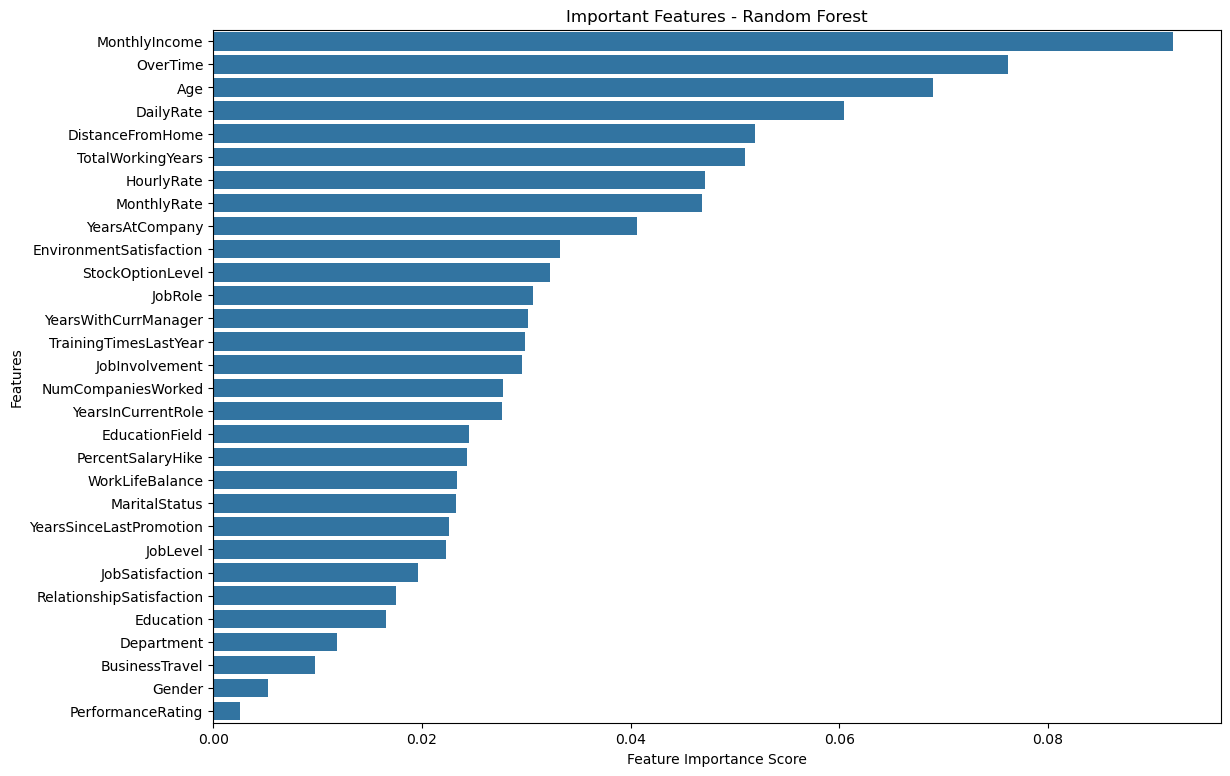

In [23]:
# Feature Importance
feature_imp = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(13, 9))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features - Random Forest")
plt.show()

In [ ]:
# Save final performance

import sys
sys.path.append(r"C:\Users\sanjy\Downloads\Employee_Attrition_Prediction")
from utils import save_performance

scores = cross_validate(best_rf, X, y, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

performance_dict = {
    "accuracy": np.mean(scores['test_accuracy']),
    "precision": np.mean(scores['test_precision']),
    "recall": np.mean(scores['test_recall']),
    "f1": np.mean(scores['test_f1'])
}

save_performance("RF_imbalanced", performance_dict)

Saved performance for RF_imbalanced
